In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from scipy import stats

[*********************100%***********************]  1 of 1 completed


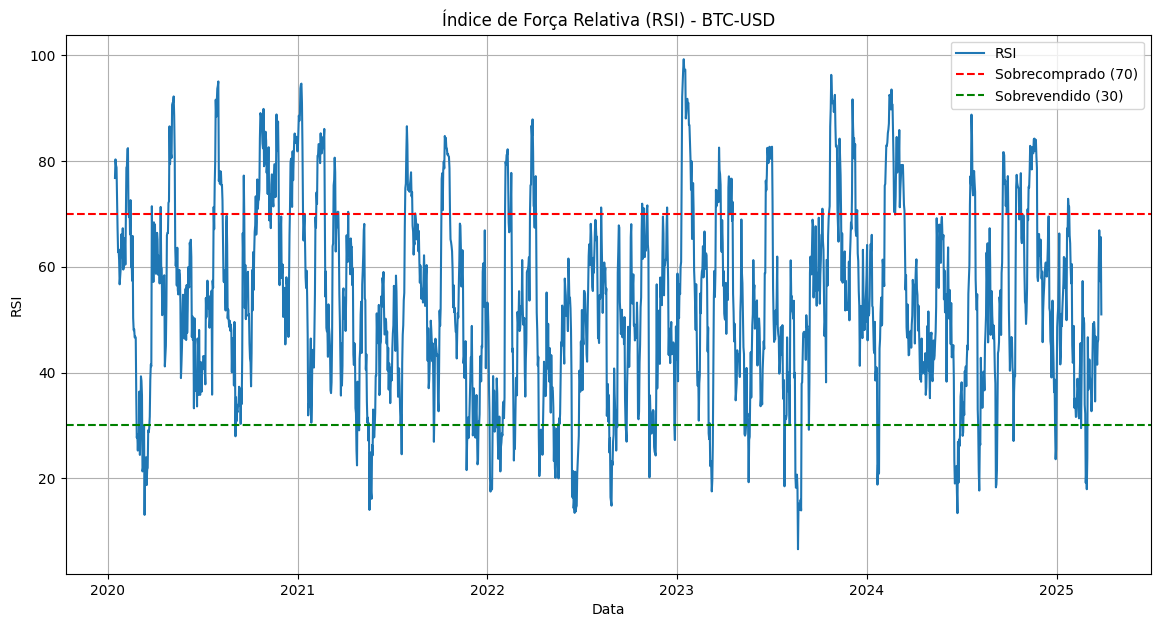

In [22]:
def calcular_RSI(df, window=14):
    """
    Calcula o RSI (Relative Strength Index) para uma DataFrame com coluna 'Close'.
    
    Parâmetros:
    - df: DataFrame contendo os preços de fechamento.
    - window: período de cálculo (normalmente 14 dias).
    
    Retorna:
    - Uma Série com o RSI calculado.
    """
    # Calcula a variação dos preços
    delta = df['Close'].diff()
    
    # Separa ganhos e perdas
    ganho = delta.copy()
    perda = delta.copy()
    ganho[ganho < 0] = 0
    perda[perda > 0] = 0
    perda = perda.abs()
    
    # Calcula as médias móveis simples para ganhos e perdas
    media_ganho = ganho.rolling(window=window, min_periods=window).mean()
    media_perda = perda.rolling(window=window, min_periods=window).mean()
    
    # Calcula o Relative Strength (RS) e o RSI
    RS = media_ganho / media_perda
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Define o ticker do ativo (por exemplo, AAPL)
ticker = "BTC-USD"

# Baixa os dados históricos do ativo
dados = yf.download(ticker, start="2020-01-01", end=datetime.now().date())

# Calcula o RSI e adiciona como coluna no DataFrame
dados['RSI'] = calcular_RSI(dados)

# Cria o gráfico do RSI
plt.figure(figsize=(14, 7))
plt.plot(dados.index, dados['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Sobrecomprado (70)')
plt.axhline(30, color='green', linestyle='--', label='Sobrevendido (30)')
plt.title(f'Índice de Força Relativa (RSI) - {ticker}')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Coeficiente de Correlação: -0.2687315842342384
Valor-p: 3.3227290191296355e-23


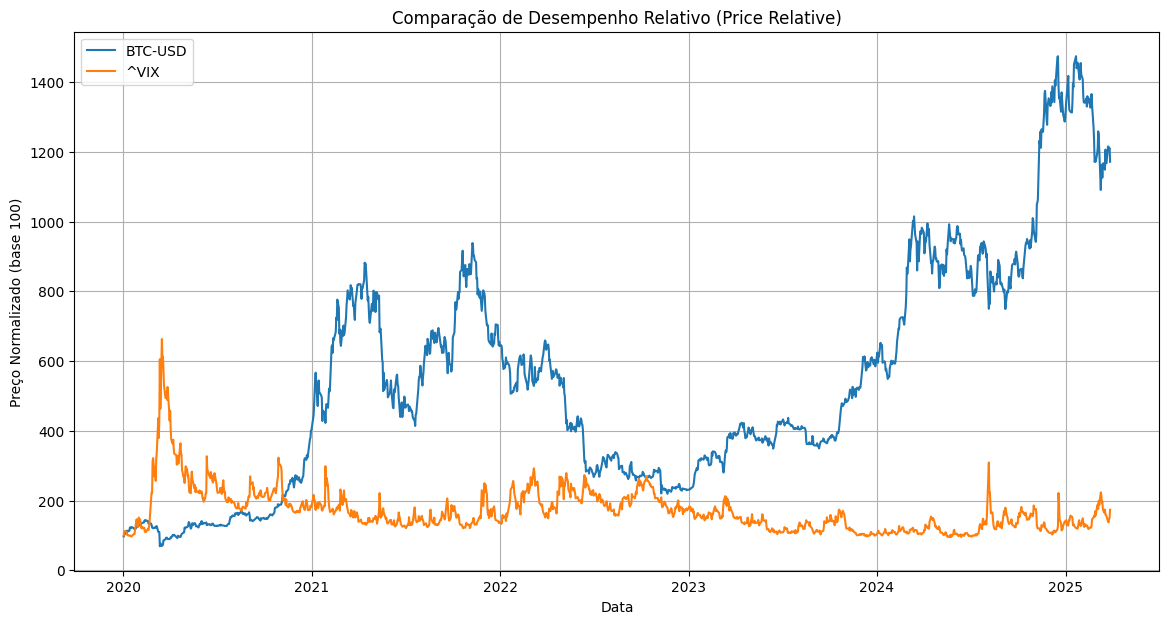

In [32]:
# Define os tickers do ativo e do benchmark (ex: AAPL e S&P 500, representado por ^GSPC)
ticker_ativo = "BTC-USD"
ticker_benchmark = "^VIX"

# Define o período de análise
start_date = "2020-01-01"
end_date = datetime.now().date()

# Baixa os dados históricos para o ativo e o benchmark
dados_ativo = yf.download(ticker_ativo, start=start_date, end=end_date)
dados_benchmark = yf.download(ticker_benchmark, start=start_date, end=end_date)

# Normaliza os preços utilizando o preço de fechamento do primeiro dia como base (100)
dados_ativo['Normalized'] = dados_ativo['Close'] / dados_ativo['Close'].iloc[0] * 100
dados_benchmark['Normalized'] = dados_benchmark['Close'] / dados_benchmark['Close'].iloc[0] * 100

# Calcula a diferença (diff) dos preços de fechamento
diff_ativo = dados_ativo['Close'].diff()
diff_benchmark = dados_benchmark['Close'].diff()

# Alinha os índices dos dois vetores e remove os NaNs
df_diff = pd.concat([diff_ativo, diff_benchmark], axis=1, join='inner').dropna()
df_diff.columns = ['diff_ativo', 'diff_benchmark']

# Calcula o coeficiente de correlação e o valor-p
coef_corr, p_value = stats.pearsonr(df_diff['diff_ativo'], df_diff['diff_benchmark'])
print('Coeficiente de Correlação:', coef_corr)
print('Valor-p:', p_value)

# Une os dados normalizados em um único DataFrame para facilitar a comparação
df_comparacao = pd.DataFrame({
    ticker_ativo: dados_ativo['Normalized'],
    ticker_benchmark: dados_benchmark['Normalized']
}).dropna()

# Cria o gráfico comparando os desempenhos relativos
plt.figure(figsize=(14, 7))
plt.plot(df_comparacao.index, df_comparacao[ticker_ativo], label=ticker_ativo)
plt.plot(df_comparacao.index, df_comparacao[ticker_benchmark], label=ticker_benchmark)
plt.title("Comparação de Desempenho Relativo (Price Relative)")
plt.xlabel("Data")
plt.ylabel("Preço Normalizado (base 100)")
plt.legend()
plt.grid(True)
plt.show()
